In [28]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
from sklearn import linear_model
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

In [24]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices',con=engine)
engine.dispose()
house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [25]:
Y = house_df['saleprice']
X = house_df[['lotarea', 'overallqual', 'grlivarea', 'totalbsmtsf', 'firstflrsf', 'garagecars']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [38]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     742.0
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:24:47   Log-Likelihood:                -13911.
No. Observations:                1168   AIC:                         2.784e+04
Df Residuals:                    1161   BIC:                         2.787e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -1.1e+05   5169.948    -21.274      

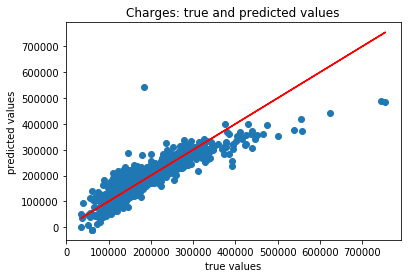

Mean absolute error of the prediction is: 24657.60405838469
Mean squared error of the prediction is: 1296306241.811761
Root mean squared error of the prediction is: 36004.25310726166
Mean absolute percentage error of the prediction is: 15.42947101975441


In [29]:
y_preds = results.predict(X_train)
plt.scatter(y_train, y_preds)
plt.plot(y_train, y_train, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_train, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_train, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_train, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_train - y_preds) / y_train)) * 100))

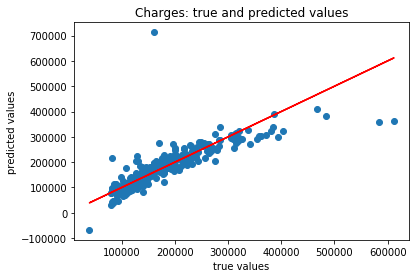

Mean absolute error of the prediction is: 25528.816094877904
Mean squared error of the prediction is: 2346248097.2424216
Root mean squared error of the prediction is: 48438.08519380614
Mean absolute percentage error of the prediction is: 15.577880811622174


In [40]:
y_preds = results.predict(X_test)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))